# Comparison Loss Function and Validation Score

1) Import der einzelnen Libraries. Sortieren der Daten nach der Zielkategorie für den ersten Überblick.
2) Aufteilen der Trainings- und Testdaten. Erstellen von notwendigen Listen
3) Erstellen von Funktionen 
4) initialisieren der einzelnen MLPClassifier Netze 
5) Ergebnisse: Textuelle Daten, geplottete Vergleiche, prozentuale Heatmaps und Reports

## imports and data

In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, balanced_accuracy_score, roc_auc_score, top_k_accuracy_score, cohen_kappa_score, matthews_corrcoef, hinge_loss
from sklearn.metrics import plot_confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import RocCurveDisplay, accuracy_score, recall_score, precision_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np
import pandas as pd
import time
covertype = fetch_covtype()
forest = fetch_covtype(as_frame=True)
covertype.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [2]:
forest.target

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

In [3]:
forestlist = forest.frame
forestlistFiltered = forestlist.filter(items=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Cover_Type'])

In [4]:
forestlist = forest.frame
forestlistSorted = forestlist.sort_values(by='Cover_Type')
forestlistSorted

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
290505,2928.0,58.0,7.0,150.0,-7.0,1836.0,226.0,225.0,133.0,190.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532739,3015.0,343.0,18.0,376.0,50.0,3378.0,181.0,211.0,166.0,1982.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532740,3018.0,341.0,18.0,350.0,53.0,3398.0,180.0,211.0,168.0,2005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532741,3021.0,345.0,18.0,324.0,45.0,3419.0,182.0,209.0,164.0,2029.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532742,3023.0,349.0,19.0,300.0,47.0,3439.0,182.0,206.0,160.0,2052.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399826,3334.0,356.0,10.0,558.0,100.0,765.0,204.0,223.0,156.0,1642.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399825,3333.0,6.0,7.0,601.0,99.0,806.0,212.0,226.0,152.0,1583.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399824,3334.0,3.0,5.0,601.0,39.0,845.0,214.0,231.0,155.0,1524.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399812,3331.0,246.0,3.0,660.0,117.0,859.0,213.0,241.0,166.0,1113.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


## training and test data

In [5]:
covertype['data'].shape

(581012, 54)

In [6]:
X_c = covertype['data']
y_c = covertype['target']

In [7]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c)
print(X_train_c.shape) 
print(X_test_c.shape)

(435759, 54)
(145253, 54)


In [8]:
scaler_c = StandardScaler()
# Fit only to the training data
scaler_c.fit(X_train_c)

StandardScaler()

In [9]:
X_train_c = scaler_c.transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

In [10]:
classificationList = []
curve = []
validation = []
iteration = []

accuracyList = []
recallList = []
precisionList = []
timeList = []

## functions

In [11]:
def plotData():
    fig, axes = plt.subplots(3,2)
    sns.histplot(data=forestlistSorted, x="Elevation", color="skyblue", label="Elevation", kde=True, ax=axes[0,0])
    sns.histplot(data=forestlistSorted, x="Aspect", color="red", label="Aspect", kde=True, ax=axes[0,0])
    sns.histplot(data=forestlistSorted, x="Slope", color="orange", label="Slope", kde=True, ax=axes[0,0])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Hydrology", color="skyblue", label="Horizontal_Distance_To_Hydrology", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Vertical_Distance_To_Hydrology", color="red", label="Vertical_Distance_To_Hydrology", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Roadways", color="orange", label="Horizontal_Distance_To_Roadways", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Fire_Points", color="green", label="Horizontal_Distance_To_Fire_Points", kde=True, ax=axes[0,1])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Hillshade_9am", color="skyblue", label="Hillshade_9am", kde=True, ax=axes[1,0])
    sns.histplot(data=forestlistSorted, x="Hillshade_Noon", color="red", label="Hillshade_Noon", kde=True, ax=axes[1,0])
    sns.histplot(data=forestlistSorted, x="Hillshade_3pm", color="orange", label="Hillshade_3pm", kde=True, ax=axes[1,0])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Soil_Type_31", color="skyblue", label="Soil_Type_31", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_32", color="red", label="Soil_Type_32", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_33", color="orange", label="Soil_Type_33", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_34", color="cyan", label="Soil_Type_34", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_35", color="darkgreen", label="Soil_Type_35", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_36", color="gold", label="Soil_Type_36", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_37", color="purple", label="Soil_Type_37", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_38", color="silver", label="Soil_Type_38", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_39", color="navy", label="Soil_Type_39", kde=True, ax=axes[1,1])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Cover_Type", color="orange", label="Cover_Type",  ax=axes[2,1], discrete=True, kde=False)
    plt.legend() 
    fig.tight_layout()

In [12]:
def addToList(mlp, liste):
    liste.append(mlp)

In [13]:
def removeFromList(mlp, liste):
    liste.remove(mlp)

In [44]:
def fitWithTime(mpl):
    begin = time.time()
    mlptrain = mpl.fit(X_train_c,y_train_c)
    end = time.time()
    timestamp = end-begin
    timeList.append(timestamp)
    print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))

In [15]:
def comparison(List):
    for mlp in List:
        print(mlp)
        print('\nparamters: ' + str(mlp.get_params(deep=True)))
        print('\nlast loss: ' + str(mlp.loss_))
        print('\nnumber of features seen during fit: ' + str(mlp.n_features_in_))
        print('\nnumber of layers: ' + str(mlp.n_layers_))
        print('\nnumber of outputs: ' + str(mlp.n_outputs_))
        print('\nname of output activation function: ' + str(mlp.out_activation_) )
        print('\nnumber of iterations: ' +str(mlp.n_iter_) )
        print('\nnumber training samples seen by the solver during fitting: ' +str(mlp.t_) )
        print('****************************************************************************************')

In [16]:
def curveValidateIteration(List, c, v, i):
    for mlp in List:
        c.append(mlp.loss_curve_)
        v.append(mlp.validation_scores_)
        i.append(np.arange(1, mlp.n_iter_+1))

__________________________________________________________________________________________________________________________________

In [17]:
cmap = ListedColormap(["coral", "azure", "indigo", "darkgreen", "lightblue", "crimson", "gold", "silver", "teal"])
def plotCurvePerInteration(List, curvy, iterate):
    print('default: hidden_layer = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, learning_rate_init = 0.001, max_iter = 200, shuffle = true, early_stopping & warm_start = FALSE')
    print('Alle Infos, die davon abweichen, werden in der Legende gelistet')
    print('****************************************************************************************')
    for i,c,cl in zip(iterate, curvy, List):
        plt.scatter(i,c, marker = '.', label = str(cl))
    plt.title('Losscurve per iteration')
    plt.xlabel("iteration")
    plt.ylabel("loss curve")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [18]:
def plotValidationPerInteration(List, validate, iterate):
    for i,v, cl in zip(iterate, validate, List):
        plt.scatter(i,v, marker = '.', label = str(cl))
    plt.title('Validation per iteration')
    plt.xlabel("iteration")
    plt.ylabel("validation")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [19]:
def plotValidationPercurve(List, validate, curvy):
    for c,v,cl in zip(validate, curvy, List):
        plt.scatter(c,v, marker = '.', label = str(cl))
    plt.title('Validation per curve')
    plt.xlabel("validation")
    plt.ylabel("curve")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()


__________________________________________________________________________________________________________________________________

In [20]:
def heatmaping(List):
    for mlp in List:
        print(mlp)
        predictions = mlp.predict(X_test_c)   
        con_ma = confusion_matrix(y_test_c,predictions)
        con_ma_perc = np.empty([7, 7], dtype=float)

        for i in range(0, 7):
            number = 0.0
            for j in range(0, 7):
                number += con_ma[i][j]
            for j in range(0, 7):
                con_ma_perc[i][j] = 100/number*con_ma[i][j]

        tree = ['Spruce', 'Lodgepole Pine', 'PoderosaPine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

        # ======== Plot confuse matrix prozentual ========

        ay = sns.heatmap(con_ma_perc, annot=True, cmap='coolwarm', yticklabels=tree, xticklabels=tree, fmt='.2f', vmin=0, vmax=100)
        ay.xaxis.tick_top()
        ay.xaxis.set_label_position('top')
        plt.xticks(rotation=90)
        ay.set(title="Confusion Matrix - Recall",
              xlabel="- Predicted Tree -",
              ylabel="- Actual Tree -")
        plt.show()

In [21]:
def reporting(List):
    for mlp in List:
        print(mlp)
        predictions = mlp.predict(X_test_c)
        print(classification_report(y_test_c,predictions))

In [22]:
def accuracyPlotting(List):
        for mlp in List:
            print(mlp)
            predictions = mlp.predict(X_test_c)
            accuracy = accuracy_score(y_test_c, predictions)
            recall = recall_score(y_test_c, predictions, average = 'weighted')
            precision = precision_score(y_test_c, predictions, average = 'weighted')
            
            addToList(accuracy, accuracyList)
            addToList(recall, recallList)
            addToList(precision, precisionList)
            
            print('Accuracy: \t{0:.2f}'.format(accuracy * 100.0))
            print('Recall: \t{0:.2f}'.format(recall * 100.0))
            print('precision: \t{0:.2f}'.format(precision * 100.0))

In [23]:
def getTimeofMLP(List):
    for mlp, t in zip(List,timeList):
        print(mlp,t/60)

## initializing nets

In [56]:
#test
classificationList.clear()
timeList.clear()

In [57]:
classificationList

[]

### relu
<li> gleichgerichtete, lineare Funktion </li>
<li> Berechnung: $f(x) = max(0, x)$ </li>

In [68]:
mlp_1 = MLPClassifier(hidden_layer_sizes= (20,20,20),  max_iter = 350, early_stopping = True, verbose = True, learning_rate = "invscaling", activation = 'relu')
begin = time.time()
mlp_1_train = mlp_1.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_1_train, classificationList)

Iteration 1, loss = 0.68554825
Validation score: 0.747453
Iteration 2, loss = 0.56969210
Validation score: 0.762346
Iteration 3, loss = 0.54572598
Validation score: 0.769024
Iteration 4, loss = 0.52690335
Validation score: 0.776827
Iteration 5, loss = 0.51223743
Validation score: 0.782036
Iteration 6, loss = 0.50140902
Validation score: 0.785800
Iteration 7, loss = 0.49384853
Validation score: 0.788347
Iteration 8, loss = 0.48772017
Validation score: 0.792959
Iteration 9, loss = 0.48256986
Validation score: 0.792615
Iteration 10, loss = 0.47799893
Validation score: 0.799637
Iteration 11, loss = 0.47405700
Validation score: 0.798054
Iteration 12, loss = 0.47022684
Validation score: 0.798444
Iteration 13, loss = 0.46698400
Validation score: 0.798605
Iteration 14, loss = 0.46379804
Validation score: 0.802254
Iteration 15, loss = 0.46133016
Validation score: 0.803171
Iteration 16, loss = 0.45938826
Validation score: 0.805397
Iteration 17, loss = 0.45752896
Validation score: 0.806843
Iterat

### tanh
<li> hyperbolic Tangens Function </li>
<li> Berechnung: $f(x) = tanh(x)$ </li>

In [69]:
mlp_2 = MLPClassifier(hidden_layer_sizes= (20,20,20), max_iter = 350, early_stopping = True, verbose = True, learning_rate = "invscaling", activation = 'tanh')
begin = time.time()
mlp_2_train = mlp_2.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_2_train, classificationList)

Iteration 1, loss = 0.68009387
Validation score: 0.754957
Iteration 2, loss = 0.56082087
Validation score: 0.769070
Iteration 3, loss = 0.52817992
Validation score: 0.780177
Iteration 4, loss = 0.50641845
Validation score: 0.785524
Iteration 5, loss = 0.48903013
Validation score: 0.795323
Iteration 6, loss = 0.47567049
Validation score: 0.799546
Iteration 7, loss = 0.46518628
Validation score: 0.803791
Iteration 8, loss = 0.45718892
Validation score: 0.807050
Iteration 9, loss = 0.45008182
Validation score: 0.810859
Iteration 10, loss = 0.44367663
Validation score: 0.813131
Iteration 11, loss = 0.43805894
Validation score: 0.816321
Iteration 12, loss = 0.43296886
Validation score: 0.818157
Iteration 13, loss = 0.42830106
Validation score: 0.821829
Iteration 14, loss = 0.42430296
Validation score: 0.820635
Iteration 15, loss = 0.42012398
Validation score: 0.824215
Iteration 16, loss = 0.41664963
Validation score: 0.826464
Iteration 17, loss = 0.41381208
Validation score: 0.824536
Iterat

### Identity
<li> Für linearen Flaschenhals </li>
<li> Berechnung: $f(x) = x$ </li>

In [59]:
mlp_3 = MLPClassifier(hidden_layer_sizes= (20,20,20), max_iter = 350, early_stopping = True, verbose = True, learning_rate = "invscaling", activation = 'identity')
begin = time.time()
mlp_3_train = mlp_3.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_3_train, classificationList)

Iteration 1, loss = 0.70458881
Validation score: 0.722737
Iteration 2, loss = 0.64099141
Validation score: 0.721039
Iteration 3, loss = 0.63859780
Validation score: 0.718010
Iteration 4, loss = 0.63779522
Validation score: 0.721085
Iteration 5, loss = 0.63706988
Validation score: 0.723013
Iteration 6, loss = 0.63698772
Validation score: 0.720947
Iteration 7, loss = 0.63628782
Validation score: 0.722049
Iteration 8, loss = 0.63640665
Validation score: 0.718308
Iteration 9, loss = 0.63588895
Validation score: 0.722209
Iteration 10, loss = 0.63560797
Validation score: 0.719433
Iteration 11, loss = 0.63578470
Validation score: 0.725170
Iteration 12, loss = 0.63536391
Validation score: 0.722187
Iteration 13, loss = 0.63525520
Validation score: 0.721636
Iteration 14, loss = 0.63518415
Validation score: 0.724481
Iteration 15, loss = 0.63503153
Validation score: 0.724757
Iteration 16, loss = 0.63486144
Validation score: 0.720970
Iteration 17, loss = 0.63470077
Validation score: 0.719708
Iterat

### Logistic
<li> Sigmoid Funktion </li>
<li> Berechnung: $ f(x) = \frac{1}{1 + exp(-x)}$ </li>

In [70]:
mlp_4 = MLPClassifier(hidden_layer_sizes= (20,20,20), max_iter = 350, early_stopping = True, verbose = True, learning_rate = "invscaling", activation = 'logistic')
begin = time.time()
mlp_4_train = mlp_4.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_4_train, classificationList)

Iteration 1, loss = 0.86882184
Validation score: 0.717092
Iteration 2, loss = 0.67310423
Validation score: 0.733638
Iteration 3, loss = 0.64170210
Validation score: 0.740958
Iteration 4, loss = 0.61841384
Validation score: 0.747040
Iteration 5, loss = 0.59873301
Validation score: 0.753695
Iteration 6, loss = 0.58306207
Validation score: 0.759569
Iteration 7, loss = 0.57013088
Validation score: 0.763769
Iteration 8, loss = 0.55967866
Validation score: 0.768565
Iteration 9, loss = 0.55145688
Validation score: 0.771870
Iteration 10, loss = 0.54438312
Validation score: 0.774922
Iteration 11, loss = 0.53760753
Validation score: 0.779443
Iteration 12, loss = 0.53186681
Validation score: 0.778571
Iteration 13, loss = 0.52762570
Validation score: 0.780636
Iteration 14, loss = 0.52352851
Validation score: 0.784744
Iteration 15, loss = 0.51959264
Validation score: 0.785364
Iteration 16, loss = 0.51622036
Validation score: 0.787131
Iteration 17, loss = 0.51277918
Validation score: 0.789425
Iterat

In [71]:
getTimeofMLP(classificationList)

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True) 5.153126867612203
MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 20, 20),
              learning_rate='invscaling', max_iter=350, verbose=True) 28.552187808354695
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True) 34.647047118345895
MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True) 64.22168788115184


In [72]:
classificationList

[MLPClassifier(activation='identity', early_stopping=True,
               hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
               max_iter=350, verbose=True),
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 20, 20),
               learning_rate='invscaling', max_iter=350, verbose=True),
 MLPClassifier(activation='tanh', early_stopping=True,
               hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
               max_iter=350, verbose=True),
 MLPClassifier(activation='logistic', early_stopping=True,
               hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
               max_iter=350, verbose=True)]

__________________________________________________________________________________________________________________________________

## Results

In [73]:
comparison(classificationList)

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)

paramters: {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 350, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}

last loss: 6.342182455773174e-01

number of features seen during fit: 54

number of layers: 5

number of outputs: 7

name of output activation function: softmax

number of iterations: 22

number training samples seen by the solver during fitting: 8628026
***************************************************************

#### Anmerkung
hier passen die Kurven gerade nicht zu den Daten - die LEgende scheint nicht zu passen. Warum auch immer

default: hidden_layer = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, learning_rate_init = 0.001, max_iter = 200, shuffle = true, early_stopping & warm_start = FALSE
Alle Infos, die davon abweichen, werden in der Legende gelistet
****************************************************************************************


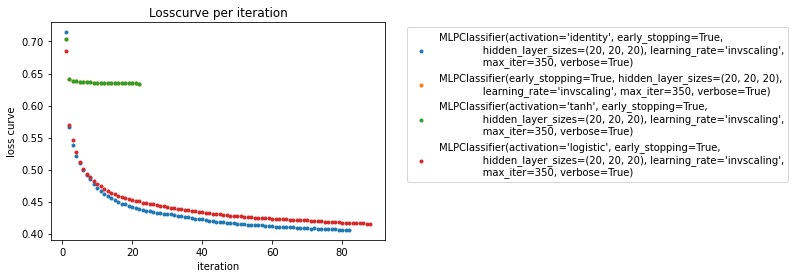

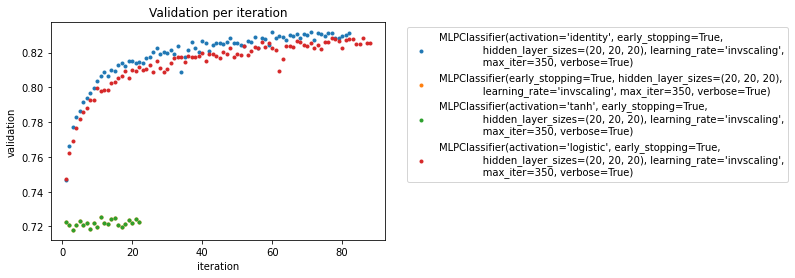

In [79]:
curveValidateIteration(classificationList, curve, validation, iteration)
plotCurvePerInteration(classificationList, curve, iteration)
plotValidationPerInteration(classificationList, validation, iteration)

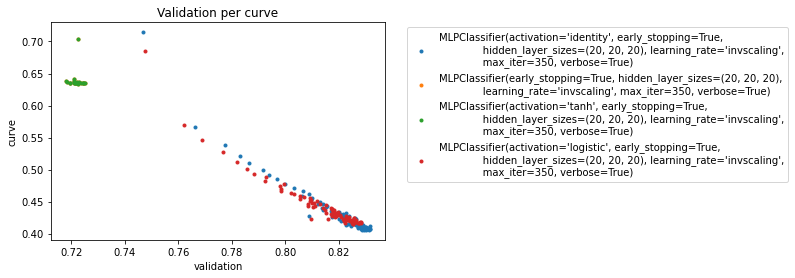

In [75]:
plotValidationPercurve(classificationList, validation, curve)

## Heatmaps

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)


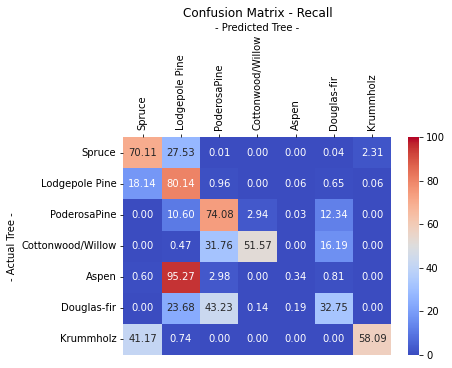

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 20, 20),
              learning_rate='invscaling', max_iter=350, verbose=True)


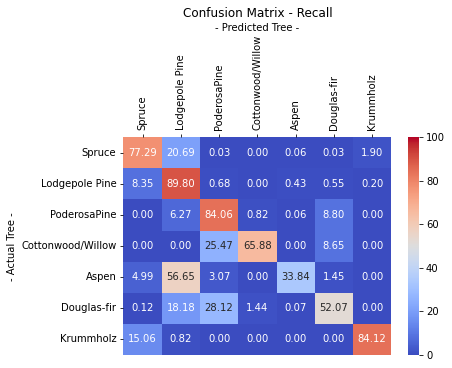

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)


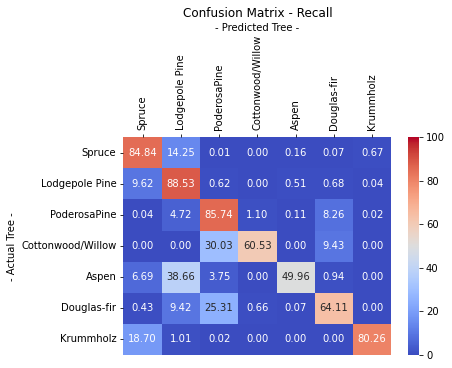

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)


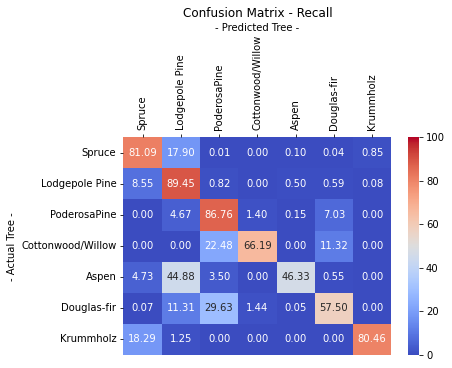

In [76]:
heatmaping(classificationList)

In [77]:
reporting(classificationList)

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)
              precision    recall  f1-score   support

           1       0.71      0.70      0.71     53227
           2       0.75      0.80      0.77     70743
           3       0.70      0.74      0.72      8933
           4       0.55      0.52      0.53       636
           5       0.14      0.00      0.01      2346
           6       0.45      0.33      0.38      4235
           7       0.70      0.58      0.64      5133

    accuracy                           0.73    145253
   macro avg       0.57      0.52      0.54    145253
weighted avg       0.71      0.73      0.72    145253

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 20, 20),
              learning_rate='invscaling', max_iter=350, verbose=True)
              precision    recall  f1-score   support

           1       0.86      0.77  

In [78]:
accuracyPlotting(classificationList)

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)
Accuracy: 	72.51
Recall: 	72.51
precision: 	71.27
MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 20, 20),
              learning_rate='invscaling', max_iter=350, verbose=True)
Accuracy: 	82.55
Recall: 	82.55
precision: 	82.49
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)
Accuracy: 	85.26
Recall: 	85.26
precision: 	85.19
MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)
Accuracy: 	84.17
Recall: 	84.17
precision: 	84.10


## Fazit
<li>Identity läuft erwartbarermaßen schlecht</li>
<li>Besonders gut funktioniert tanh in Kombination mit der learning rate invscaling und  dem solver adam  </li>
<li>Auch die activation logistic funktioniert ganz gut</li>